# Ví dụ 1:

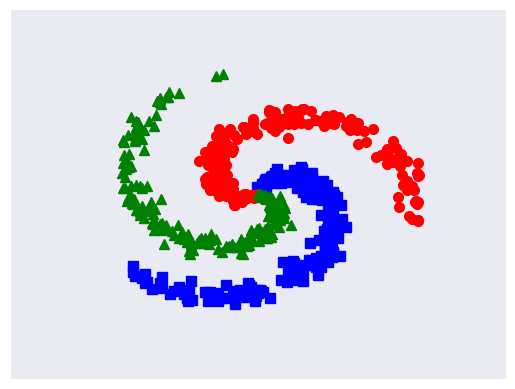

In [8]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()


In [9]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [10]:


# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]  

In [11]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [12]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3

# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [13]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    
    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
        
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098740
iter 1000, loss: 0.120214
iter 2000, loss: 0.056841
iter 3000, loss: 0.035870
iter 4000, loss: 0.027770
iter 5000, loss: 0.023480
iter 6000, loss: 0.020801
iter 7000, loss: 0.019005
iter 8000, loss: 0.017677
iter 9000, loss: 0.016626


In [14]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
100


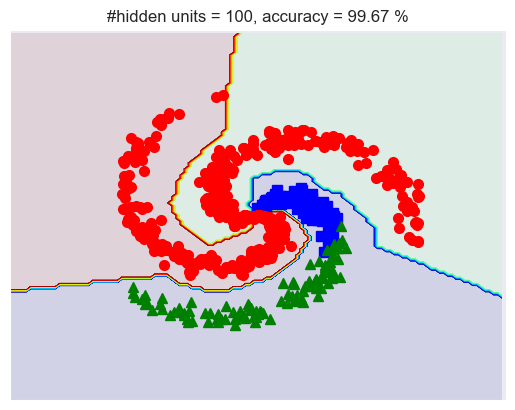

In [15]:
# Visualize results

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 100
print(N)
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

# Bài tập ứng dụng 1

In [16]:
# Import thư viện cần thiết
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import time

# Tải dữ liệu Iris
iris = load_iris()
X_full, y_full = iris.data.T, iris.target  # Chuyển X thành dạng (features, samples)

# Lấy 40 mẫu training và 10 mẫu validation cho mỗi lớp
N_train, N_val = 40, 10
X_train, y_train = np.zeros((4, N_train*3)), np.zeros(N_train*3, dtype='uint8')
X_val, y_val = np.zeros((4, N_val*3)), np.zeros(N_val*3, dtype='uint8')
for c in range(3):
    idx = np.where(y_full == c)[0]
    np.random.shuffle(idx)
    train_idx, val_idx = idx[:N_train], idx[N_train:N_train+N_val]
    X_train[:, c*N_train:(c+1)*N_train] = X_full[:, train_idx]
    y_train[c*N_train:(c+1)*N_train] = y_full[train_idx]
    X_val[:, c*N_val:(c+1)*N_val] = X_full[:, val_idx]
    y_val[c*N_val:(c+1)*N_val] = y_full[val_idx]

In [17]:
# Hàm chuyển nhãn sang one-hot coding
def convert_labels(y, C=3):
    Y = np.zeros((C, len(y)))
    for i in range(len(y)):
        Y[y[i], i] = 1
    return Y

# Hàm softmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    return e_V / e_V.sum(axis=0)

# Hàm tính loss
def cost(Y, Yhat):
    return -np.sum(Y * np.log(Yhat + 1e-9)) / Y.shape[1]

In [18]:
# Huấn luyện và đánh giá ANN
def train_ann(X_train, y_train, X_val, y_val, h=100):
    d0, d2 = 4, 3  
    W1 = 0.01 * np.random.randn(d0, h)
    b1 = np.zeros((h, 1))
    W2 = 0.01 * np.random.randn(h, d2)
    b2 = np.zeros((d2, 1))
    Y = convert_labels(y_train)
    eta = 0.1
    start_time = time.time()
    for i in range(5000):
        Z1 = np.dot(W1.T, X_train) + b1
        A1 = np.maximum(Z1, 0)  
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)
        if i % 1000 == 0:
            loss = cost(Y, Yhat)
            print(f"ANN iter {i}, loss: {loss:.4f}")
        E2 = (Yhat - Y) / X_train.shape[1]
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis=1, keepdims=True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0
        dW1 = np.dot(X_train, E1.T)
        db1 = np.sum(E1, axis=1, keepdims=True)
        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2
    train_time = time.time() - start_time

    def predict(X):
        Z1 = np.dot(W1.T, X) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        return np.argmax(Z2, axis=0)

    start_time = time.time()
    y_train_pred = predict(X_train)
    y_val_pred = predict(X_val)
    predict_time = (time.time() - start_time) / (X_train.shape[1] + X_val.shape[1])

    
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, average='macro')
    rec = recall_score(y_val, y_val_pred, average='macro')
    cm = confusion_matrix(y_val, y_val_pred)
    return acc_train, acc_val, prec, rec, cm, train_time, predict_time, predict


Kết quả ANN với h=100:
ANN iter 0, loss: 1.0979
ANN iter 1000, loss: 0.0574
ANN iter 2000, loss: 0.0515
ANN iter 3000, loss: 0.0485
ANN iter 4000, loss: 0.0462
Accuracy Train: 0.9833, Validation: 0.9667
Precision: 0.9697, Recall: 0.9667
Thời gian train: 0.3624s, Thời gian predict: 0.000000s


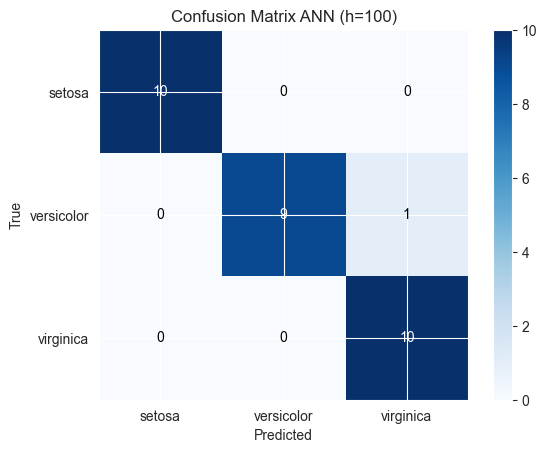


Kết quả ANN với h=75:
ANN iter 0, loss: 1.0988
ANN iter 1000, loss: 0.0575
ANN iter 2000, loss: 0.0516
ANN iter 3000, loss: 0.0486
ANN iter 4000, loss: 0.0463
Accuracy Train: 0.9833, Validation: 0.9667
Precision: 0.9697, Recall: 0.9667
Thời gian train: 0.2877s, Thời gian predict: 0.000000s


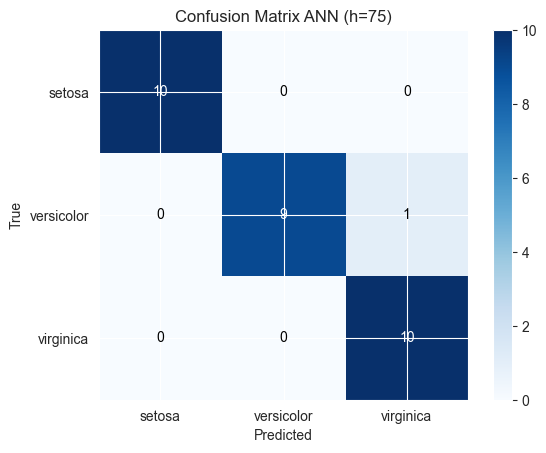


Kết quả ANN với h=50:
ANN iter 0, loss: 1.0980
ANN iter 1000, loss: 0.0575
ANN iter 2000, loss: 0.0516
ANN iter 3000, loss: 0.0486
ANN iter 4000, loss: 0.0463
Accuracy Train: 0.9833, Validation: 0.9667
Precision: 0.9697, Recall: 0.9667
Thời gian train: 0.2259s, Thời gian predict: 0.000000s


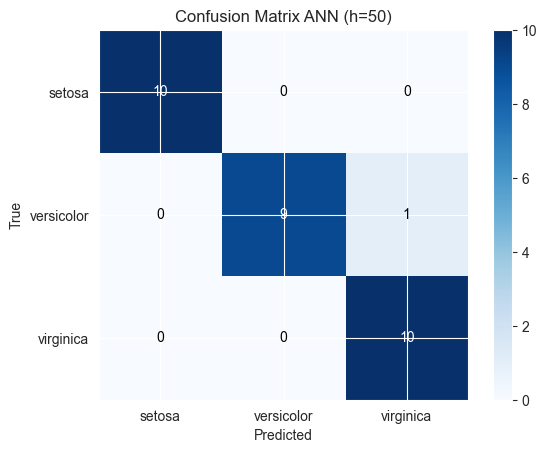

In [19]:
# Thực nghiệm với ANN (h=100, 75, 50)
for h in [100, 75, 50]:
    print(f"\nKết quả ANN với h={h}:")
    acc_train, acc_val, prec, rec, cm, train_time, predict_time, _ = train_ann(X_train, y_train, X_val, y_val, h)
    print(f"Accuracy Train: {acc_train:.4f}, Validation: {acc_val:.4f}")
    print(f"Precision: {prec:.4f}, Recall: {rec:.4f}")
    print(f"Thời gian train: {train_time:.4f}s, Thời gian predict: {predict_time:.6f}s")
    
    # Sửa đoạn code vẽ confusion matrix để thêm số
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ANN (h={h})')
    plt.colorbar()
    plt.xticks([0, 1, 2], iris.target_names)
    plt.yticks([0, 1, 2], iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Thêm số vào từng ô
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), 
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.show()


Kết quả SoftMax Regression:
Accuracy Train: 0.9833, Validation: 0.9000
Precision: 0.9024, Recall: 0.9000
Thời gian train: 0.0145s, Thời gian predict: 0.000001s


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


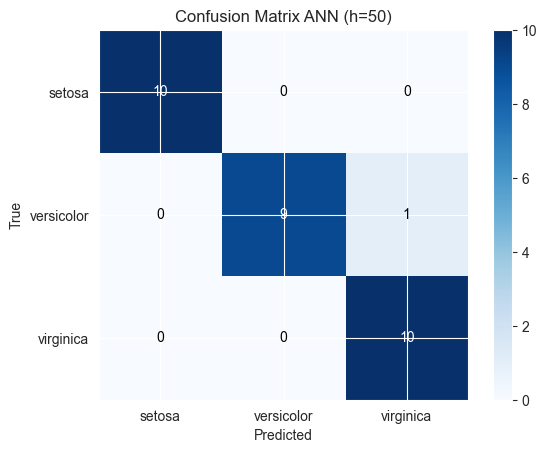

In [20]:
# Huấn luyện và đánh giá SoftMax Regression
def train_softmax(X_train, y_train, X_val, y_val):
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    start_time = time.time()
    model.fit(X_train.T, y_train)  # Chuyển X về dạng (samples, features)
    train_time = time.time() - start_time
    start_time = time.time()
    y_train_pred = model.predict(X_train.T)
    y_val_pred = model.predict(X_val.T)
    predict_time = (time.time() - start_time) / (X_train.shape[1] + X_val.shape[1])
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, average='macro')
    rec = recall_score(y_val, y_val_pred, average='macro')
    cm = confusion_matrix(y_val, y_val_pred)
    return acc_train, acc_val, prec, rec, cm, train_time, predict_time
# Thực nghiệm với SoftMax Regression
print("\nKết quả SoftMax Regression:")
acc_train_sm, acc_val_sm, prec_sm, rec_sm, cm_sm, train_time_sm, predict_time_sm = train_softmax(X_train, y_train, X_val, y_val)
print(f"Accuracy Train: {acc_train_sm:.4f}, Validation: {acc_val_sm:.4f}")
print(f"Precision: {prec_sm:.4f}, Recall: {rec_sm:.4f}")
print(f"Thời gian train: {train_time_sm:.4f}s, Thời gian predict: {predict_time_sm:.6f}s")
# Sửa đoạn code vẽ confusion matrix để thêm số
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix ANN (h={h})')
plt.colorbar()
plt.xticks([0, 1, 2], iris.target_names)
plt.yticks([0, 1, 2], iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

# Thêm số vào từng ô
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()


Kết quả SoftMax Regression:
Accuracy Train: 0.9833, Validation: 0.9000
Precision: 0.9024, Recall: 0.9000
Thời gian train: 0.0082s, Thời gian predict: 0.000001s


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


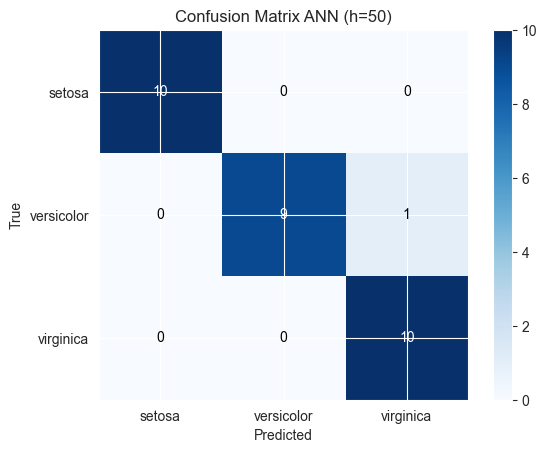

In [21]:
# Thực nghiệm với SoftMax Regression
print("\nKết quả SoftMax Regression:")
acc_train_sm, acc_val_sm, prec_sm, rec_sm, cm_sm, train_time_sm, predict_time_sm = train_softmax(X_train, y_train, X_val, y_val)
print(f"Accuracy Train: {acc_train_sm:.4f}, Validation: {acc_val_sm:.4f}")
print(f"Precision: {prec_sm:.4f}, Recall: {rec_sm:.4f}")
print(f"Thời gian train: {train_time_sm:.4f}s, Thời gian predict: {predict_time_sm:.6f}s")
# Sửa đoạn code vẽ confusion matrix để thêm số
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix ANN (h={h})')
plt.colorbar()
plt.xticks([0, 1, 2], iris.target_names)
plt.yticks([0, 1, 2], iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

# Thêm số vào từng ô
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [22]:
# Huấn luyện và đánh giá Naïve Bayes
def train_nb(X_train, y_train, X_val, y_val):
    model = GaussianNB()
    start_time = time.time()
    model.fit(X_train.T, y_train)
    train_time = time.time() - start_time
    start_time = time.time()
    y_train_pred = model.predict(X_train.T)
    y_val_pred = model.predict(X_val.T)
    predict_time = (time.time() - start_time) / (X_train.shape[1] + X_val.shape[1])
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred, average='macro')
    rec = recall_score(y_val, y_val_pred, average='macro')
    cm = confusion_matrix(y_val, y_val_pred)
    return acc_train, acc_val, prec, rec, cm, train_time, predict_time


Kết quả Naïve Bayes:
Accuracy Train: 0.9750, Validation: 0.9000
Precision: 0.9024, Recall: 0.9000
Thời gian train: 0.0006s, Thời gian predict: 0.000001s


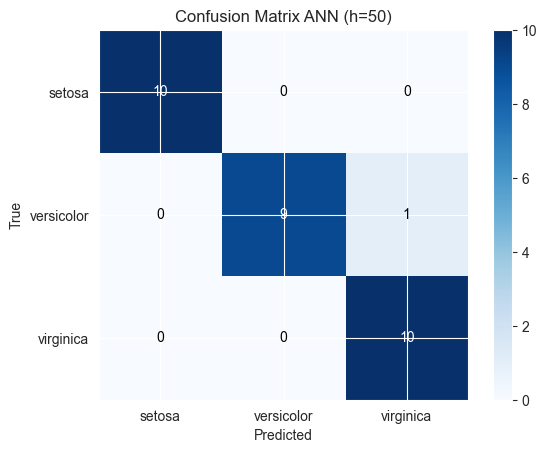

In [23]:
# Thực nghiệm với Naïve Bayes
print("\nKết quả Naïve Bayes:")
acc_train_nb, acc_val_nb, prec_nb, rec_nb, cm_nb, train_time_nb, predict_time_nb = train_nb(X_train, y_train, X_val, y_val)
print(f"Accuracy Train: {acc_train_nb:.4f}, Validation: {acc_val_nb:.4f}")
print(f"Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}")
print(f"Thời gian train: {train_time_nb:.4f}s, Thời gian predict: {predict_time_nb:.6f}s")
# Sửa đoạn code vẽ confusion matrix để thêm số
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix ANN (h={h})')
plt.colorbar()
plt.xticks([0, 1, 2], iris.target_names)
plt.yticks([0, 1, 2], iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

# Thêm số vào từng ô
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Ví dụ 2

In [24]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# a. Load dữ liệu và giảm chiều

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

# Chọn 5000 ảnh bất kỳ
np.random.seed(42)
indices = np.random.choice(X.shape[0], 5000, replace=False)
X_subset, y_subset = X[indices], y[indices]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Giảm chiều xuống 125 chiều
pca = PCA(n_components=125, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [75]:
# b. Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_subset, test_size=0.3, random_state=42
)

# Logistic Regression

start_time = time.time()
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
time_logreg = time.time() - start_time
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# ANN với hidden_layer_size=125
start_time = time.time()
ann_125 = MLPClassifier(hidden_layer_sizes=(125,), max_iter=500, random_state=42)
ann_125.fit(X_train, y_train)
y_pred_ann125 = ann_125.predict(X_test)
time_ann125 = time.time() - start_time
acc_ann125 = accuracy_score(y_test, y_pred_ann125)

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [76]:

# c. So sánh hai mô hình

print("=== So sánh Logistic Regression vs ANN (hidden_layer=125) ===")
print(f"{'Mô hình':<30}{'Thời gian (s)':<15}{'Accuracy':<10}")
print(f"{'Logistic Regression':<30}{time_logreg:<15.2f}{acc_logreg:<10.4f}")
print(f"{'ANN hidden_layer=125':<30}{time_ann125:<15.2f}{acc_ann125:<10.4f}")

# Nhận xét
if acc_ann125 > acc_logreg:
    print("\nNhận xét: ANN có độ chính xác cao hơn Logistic Regression.")
else:
    print("\nNhận xét: Logistic Regression có độ chính xác cao hơn hoặc bằng ANN.")

if time_ann125 > time_logreg:
    print("Nhận xét: ANN mất thời gian huấn luyện lâu hơn Logistic Regression.")
else:
    print("Nhận xét: Logistic Regression mất thời gian lâu hơn hoặc bằng ANN.")


=== So sánh Logistic Regression vs ANN (hidden_layer=125) ===
Mô hình                       Thời gian (s)  Accuracy  
Logistic Regression           0.63           0.8693    
ANN hidden_layer=125          10.00          0.9167    

Nhận xét: ANN có độ chính xác cao hơn Logistic Regression.
Nhận xét: ANN mất thời gian huấn luyện lâu hơn Logistic Regression.


In [77]:
# d. ANN với hidden_layer_size=150

start_time = time.time()
ann_150 = MLPClassifier(hidden_layer_sizes=(150,), max_iter=500, random_state=42)
ann_150.fit(X_train, y_train)
y_pred_train_ann150 = ann_150.predict(X_train)
y_pred_test_ann150 = ann_150.predict(X_test)
time_ann150 = time.time() - start_time
acc_train_ann150 = accuracy_score(y_train, y_pred_train_ann150)
acc_test_ann150 = accuracy_score(y_test, y_pred_test_ann150)

# Kết quả
print(" Logistic Regression ")
print(f"Time: {time_logreg:.2f}s, Accuracy: {acc_logreg:.4f}")

print("\n ANN hidden_layer=125 ")
print(f"Time: {time_ann125:.2f}s, Accuracy: {acc_ann125:.4f}")

print("\n ANN hidden_layer=150 ")
print(f"Time: {time_ann150:.2f}s, Train Accuracy: {acc_train_ann150:.4f}, Test Accuracy: {acc_test_ann150:.4f}")

 Logistic Regression 
Time: 0.63s, Accuracy: 0.8693

 ANN hidden_layer=125 
Time: 10.00s, Accuracy: 0.9167

 ANN hidden_layer=150 
Time: 2.95s, Train Accuracy: 1.0000, Test Accuracy: 0.9253


VÍ DỤ 3

In [78]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/Dry_Bean_Dataset.csv')
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

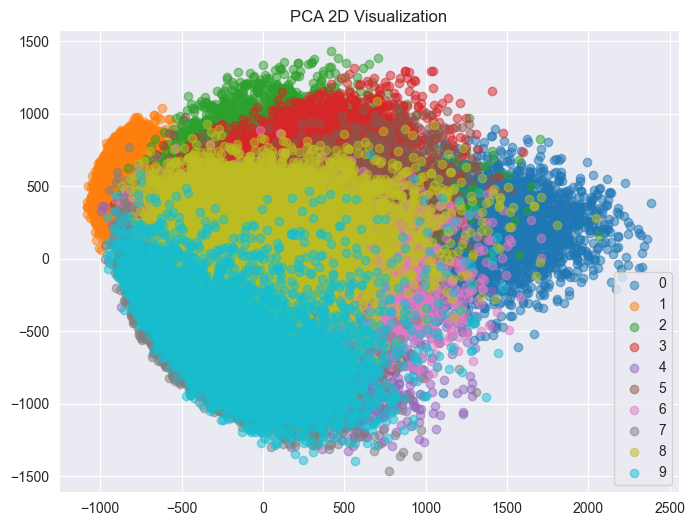

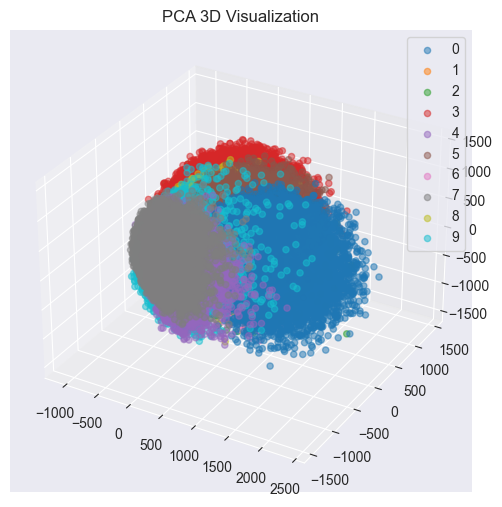

In [25]:
# (a) PCA to 2D and 3D, visualize
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_2d[y == label, 0], X_2d[y == label, 1], label=label, alpha=0.5)
plt.title('PCA 2D Visualization')
plt.legend()
plt.show()

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    ax.scatter(X_3d[y == label, 0], X_3d[y == label, 1], X_3d[y == label, 2], label=label, alpha=0.5)
ax.set_title('PCA 3D Visualization')
ax.legend()
plt.show()

(b) Lấy dữ liệu gốc, thực hiện chia dữ liệu thành tập train:validion với tỉ lệ 7:3, sau đó

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


a. Phân loại bằng phương pháp Naïve Bayes phù hợp. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả

Naïve Bayes - Train Acc: 0.7656135194709772 Prec: 0.7714789830624557 Rec: 0.7677542162312906
Naïve Bayes - Val Acc: 0.7627326150832517 Prec: 0.7681969291661278 Rec: 0.7653776479998632


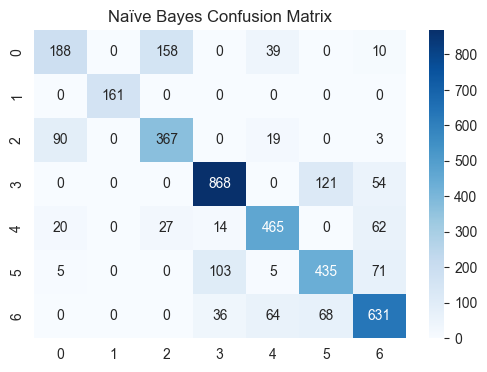

In [81]:
# Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_train_pred = nb.predict(X_train)
nb_val_pred = nb.predict(X_val)
nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_val_acc = accuracy_score(y_val, nb_val_pred)
nb_train_prec = precision_score(y_train, nb_train_pred, average='macro')
nb_val_prec = precision_score(y_val, nb_val_pred, average='macro')
nb_train_rec = recall_score(y_train, nb_train_pred, average='macro')
nb_val_rec = recall_score(y_val, nb_val_pred, average='macro')
nb_cm = confusion_matrix(y_val, nb_val_pred)
print("Naïve Bayes - Train Acc:", nb_train_acc, "Prec:", nb_train_prec, "Rec:", nb_train_rec)
print("Naïve Bayes - Val Acc:", nb_val_acc, "Prec:", nb_val_prec, "Rec:", nb_val_rec)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()

b. Phân loại bằng phương pháp Multinomial Logistic Regression. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả và ý nghĩa của các hệ số thu được từ mô hình.

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Train Acc: 0.8548336307337042 Prec: 0.8740167250670792 Rec: 0.8653009314393484
Logistic Regression - Val Acc: 0.8540646425073457 Prec: 0.8729498980706837 Rec: 0.8668667420454271


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


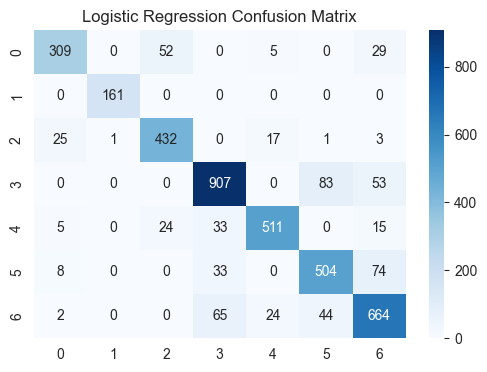

In [82]:
# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_val_pred = lr.predict(X_val)
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_val_acc = accuracy_score(y_val, lr_val_pred)
lr_train_prec = precision_score(y_train, lr_train_pred, average='macro')
lr_val_prec = precision_score(y_val, lr_val_pred, average='macro')
lr_train_rec = recall_score(y_train, lr_train_pred, average='macro')
lr_val_rec = recall_score(y_val, lr_val_pred, average='macro')
lr_cm = confusion_matrix(y_val, lr_val_pred)
print("Logistic Regression - Train Acc:", lr_train_acc, "Prec:", lr_train_prec, "Rec:", lr_train_rec)
print("Logistic Regression - Val Acc:", lr_val_acc, "Prec:", lr_val_prec, "Rec:", lr_val_rec)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


c. Xây dựng một mô hình ANN với 01 tầng ẩn (ngoại trừ đầu vào và đầu ra), số chiều của tầng ẩn là 32, đầu ra sử dụng dạng hàm loss và phân loại phù hợp. Sử dụng mô hình này để phân loại dữ liệu nói trên. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả

In [83]:
# ANN (corrected)
ann = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500, solver='adam')  # Default log loss implicit
ann.fit(X_train, y_train)
ann_train_pred = ann.predict(X_train)
ann_val_pred = ann.predict(X_val)
ann_train_acc = accuracy_score(y_train, ann_train_pred)
ann_val_acc = accuracy_score(y_val, ann_val_pred)
ann_train_prec = precision_score(y_train, ann_train_pred, average='macro')
ann_val_prec = precision_score(y_val, ann_val_pred, average='macro')
ann_train_rec = recall_score(y_train, ann_train_pred, average='macro')
ann_val_rec = recall_score(y_val, ann_val_pred, average='macro')
print("ANN - Train Acc:", ann_train_acc, "Prec:", ann_train_prec, "Rec:", ann_train_rec)
print("ANN - Val Acc:", ann_val_acc, "Prec:", ann_val_prec, "Rec:", ann_val_rec)
# Explanation: ANN captures non-linear patterns, may overfit if not tuned.

ANN - Train Acc: 0.3600293901542983 Prec: 0.14279420717927918 Rec: 0.2720710454922116
ANN - Val Acc: 0.3401077375122429 Prec: 0.12115040809551067 Rec: 0.26531825808063886


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(c) Giảm dữ liệu xuống còn 04 chiều, sau đó thực hiện lại tất cả các công việc trong ý (b). Hãy giải thích kết quả và cho biết mô hình nào bị ảnh hưởng nhiều nhất bởi việc giảm chiều dữ liệu.

Naïve Bayes 4D - Train Acc: 0.8939855148525244 Prec: 0.9048156853282893 Rec: 0.9091818359092966
Naïve Bayes 4D - Val Acc: 0.8964250734573947 Prec: 0.9058021999456304 Rec: 0.9107768396374658


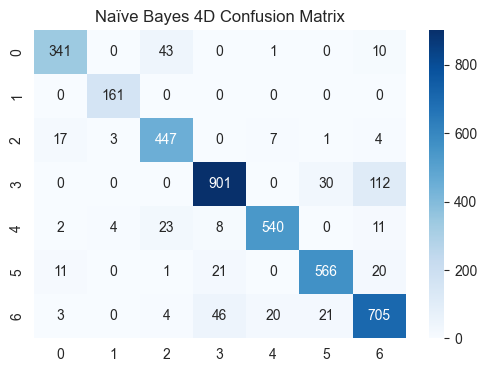

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 4D - Train Acc: 0.8834890311745566 Prec: 0.8966836103978145 Rec: 0.8966023894957417
Logistic Regression 4D - Val Acc: 0.8917727717923605 Prec: 0.9061072020496838 Rec: 0.9047802551662103


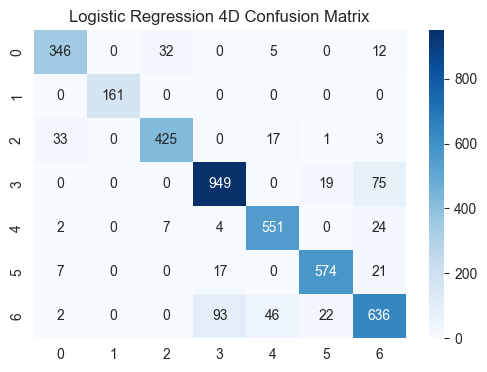

ANN 4D - Train Acc: 0.8442321822189567 Prec: 0.8598378741422082 Rec: 0.8622746591858139
ANN 4D - Val Acc: 0.8418217433888345 Prec: 0.855318940626573 Rec: 0.856844901719168


In [84]:
# (c) PCA to 4D
pca_4d = PCA(n_components=4)
X_4d = pca_4d.fit_transform(X)
X_train_4d, X_val_4d, y_train, y_val = train_test_split(X_4d, y, test_size=0.3, random_state=42)

# Repeat for Naïve Bayes
nb.fit(X_train_4d, y_train)
nb_train_pred_4d = nb.predict(X_train_4d)
nb_val_pred_4d = nb.predict(X_val_4d)
nb_train_acc_4d = accuracy_score(y_train, nb_train_pred_4d)
nb_val_acc_4d = accuracy_score(y_val, nb_val_pred_4d)
nb_train_prec_4d = precision_score(y_train, nb_train_pred_4d, average='macro')
nb_val_prec_4d = precision_score(y_val, nb_val_pred_4d, average='macro')
nb_train_rec_4d = recall_score(y_train, nb_train_pred_4d, average='macro')
nb_val_rec_4d = recall_score(y_val, nb_val_pred_4d, average='macro')
nb_cm_4d = confusion_matrix(y_val, nb_val_pred_4d)
print("Naïve Bayes 4D - Train Acc:", nb_train_acc_4d, "Prec:", nb_train_prec_4d, "Rec:", nb_train_rec_4d)
print("Naïve Bayes 4D - Val Acc:", nb_val_acc_4d, "Prec:", nb_val_prec_4d, "Rec:", nb_val_rec_4d)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm_4d, annot=True, fmt='d', cmap='Blues')
plt.title('Naïve Bayes 4D Confusion Matrix')
plt.show()

# Repeat for Logistic Regression
lr.fit(X_train_4d, y_train)
lr_train_pred_4d = lr.predict(X_train_4d)
lr_val_pred_4d = lr.predict(X_val_4d)
lr_train_acc_4d = accuracy_score(y_train, lr_train_pred_4d)
lr_val_acc_4d = accuracy_score(y_val, lr_val_pred_4d)
lr_train_prec_4d = precision_score(y_train, lr_train_pred_4d, average='macro')
lr_val_prec_4d = precision_score(y_val, lr_val_pred_4d, average='macro')
lr_train_rec_4d = recall_score(y_train, lr_train_pred_4d, average='macro')
lr_val_rec_4d = recall_score(y_val, lr_val_pred_4d, average='macro')
lr_cm_4d = confusion_matrix(y_val, lr_val_pred_4d)
print("Logistic Regression 4D - Train Acc:", lr_train_acc_4d, "Prec:", lr_train_prec_4d, "Rec:", lr_train_rec_4d)
print("Logistic Regression 4D - Val Acc:", lr_val_acc_4d, "Prec:", lr_val_prec_4d, "Rec:", lr_val_rec_4d)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm_4d, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression 4D Confusion Matrix')
plt.show()

# Repeat for ANN
ann.fit(X_train_4d, y_train)
ann_train_pred_4d = ann.predict(X_train_4d)
ann_val_pred_4d = ann.predict(X_val_4d)
ann_train_acc_4d = accuracy_score(y_train, ann_train_pred_4d)
ann_val_acc_4d = accuracy_score(y_val, ann_val_pred_4d)
ann_train_prec_4d = precision_score(y_train, ann_train_pred_4d, average='macro')
ann_val_prec_4d = precision_score(y_val, ann_val_pred_4d, average='macro')
ann_train_rec_4d = recall_score(y_train, ann_train_pred_4d, average='macro')
ann_val_rec_4d = recall_score(y_val, ann_val_pred_4d, average='macro')
print("ANN 4D - Train Acc:", ann_train_acc_4d, "Prec:", ann_train_prec_4d, "Rec:", ann_train_rec_4d)
print("ANN 4D - Val Acc:", ann_val_acc_4d, "Prec:", ann_val_prec_4d, "Rec:", ann_val_rec_4d)

# Ví dụ 4

In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os  

# path to the database
path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data'
ids = range(1, 16)  # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight', 'sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'  

fn = os.path.join(path, prefix + '01.' + states[0] + surfix)
im = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
if im is None:
    raise FileNotFoundError(f"Không tìm thấy file: {fn}")
h, w = im.shape
D = h * w
N = len(states) * len(ids)
print(N, D, h, w)

X = np.zeros((D, N))

count = 0
for person_id in range(1, 16):
    for state in states:
        fn = os.path.join(path, prefix + str(person_id).zfill(2) + '.' + state + surfix)
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        if tmp is None:
            print(f"Không tìm thấy file: {fn}")
            continue
        X[:, count] = tmp.reshape(D)
        count += 1

print("Hoàn tất nạp dữ liệu, shape X:", X.shape)


165 77760 243 320
Hoàn tất nạp dữ liệu, shape X: (77760, 165)


(i) Giảm số chiều dữ liệu xuống còn 125.

In [86]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn y
y = np.repeat(np.arange(15), 11) 

# a. Giảm chiều dữ liệu xuống 125 bằng PCA
pca = PCA(n_components=125)
X_reduced = pca.fit_transform(X.T) 
print("Shape sau khi giảm chiều:", X_reduced.shape)

Shape sau khi giảm chiều: (165, 125)


(ii) Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression, Naïve Bayes phù hợp và ANN để phân loại, tỷ lệ train:test là 0.7:0.3

In [87]:
# Chia tập train và test với tỷ lệ 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# 1. Multinomial Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Độ chính xác Logistic Regression:", accuracy_log)

# 2. Gaussian Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Độ chính xác Naïve Bayes:", accuracy_nb)

# 3. ANN (Artificial Neural Network)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Độ chính xác ANN:", accuracy_ann)

Độ chính xác Logistic Regression: 0.98
Độ chính xác Naïve Bayes: 0.72
Độ chính xác ANN: 0.56


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


(iii) Sử dụng toàn bộ 165 ảnh làm train và dự đoán 5 ảnh mới

In [88]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Giả sử X và y đã được định nghĩa từ code ban đầu
# X: (77760, 165), y: (165,)

# Giảm chiều toàn bộ dữ liệu xuống 125
pca = PCA(n_components=125)
X_reduced = pca.fit_transform(X.T)  # Shape: (165, 125)
y = np.repeat(np.arange(15), 11)

# Huấn luyện mô hình ANN trên toàn bộ dữ liệu
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_reduced, y)

# Hàm xử lý ảnh mới
def process_new_image(file_path, h=320, w=243):
    # Đọc ảnh và chuyển thành ảnh xám
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize về kích thước (320, 243)
    img_resized = cv2.resize(img, (w, h))
    # Duỗi thành vector
    img_vector = img_resized.reshape(-1)
    # Giảm chiều bằng PCA đã huấn luyện
    img_reduced = pca.transform([img_vector])  # Shape: (1, 125)
    return img_reduced

# Danh sách 5 ảnh mới (giả định đường dẫn)
new_image_paths = [
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data/subject01.centerlight.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data/subject01.glasses.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data/subject01.happy.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data/subject01.leftlight.png',
    '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab9/face_data/subject01.noglasses.png'
]

# Dự đoán cho từng ảnh mới
for i, img_path in enumerate(new_image_paths):
    img_reduced = process_new_image(img_path)
    prediction = ann.predict(img_reduced)
    print(f"Ảnh {i+1} thuộc nhóm: {prediction[0]}")

Ảnh 1 thuộc nhóm: 14
Ảnh 2 thuộc nhóm: 14
Ảnh 3 thuộc nhóm: 14
Ảnh 4 thuộc nhóm: 14
Ảnh 5 thuộc nhóm: 4
